
**Задание 1**

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим 'undefined'.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

Результат классификации запишите в отдельный столбец region.

In [55]:
import pandas as pd

In [547]:
df=pd.read_csv('keywords.csv')
df.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [543]:
# Добавил еще один признак меньшей размерности для проверки
geo_data = {
'Соцсети':['вк',  'вконтакте' ],

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

In [544]:
def classification(data_frame):
    for key,value in geo_data.items():
        for val in value:
            if val in data_frame['keyword']:
                return key
            
    return 'undefined'

In [545]:
df['region']=df.apply(classification,axis=1)


In [546]:
df['region'].value_counts()

undefined         98077
Соцсети            1183
Центр               384
Северо-Запад        262
Дальний Восток       94
Name: region, dtype: int64

In [542]:
df.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


**Задание 2**

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
    - оценка 2 и меньше - низкий рейтинг
    - оценка 4 и меньше - средний рейтинг
    - оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [444]:
import pandas as pd

In [567]:
df=pd.read_csv('ratings.csv')
#df=df.head() # взял не все данные, для быстрого проведения расчетов
df['movieId'].value_counts().head()


356    341
296    324
318    311
593    304
260    291
Name: movieId, dtype: int64

In [573]:
def classificaton():
    df = ratings[['movieId','rating']]
    df=df.groupby('movieId').mean().reset_index()    
    
    a=[]
    for i in range(len(df)):
        if df['rating'][i]<=2:
            a.append('низкий рейтинг')
        if df['rating'][i]>4:
            a.append('высокий рейтинг')
        if 2<df['rating'][i]<=4:
            a.append('средний рейтинг')

    clas=pd.DataFrame(a,columns=['class'])
    print(pd.concat([df,clas], axis=1))

In [576]:
classificaton()

      movieId    rating            class
0           1  3.872470  средний рейтинг
1           2  3.401869  средний рейтинг
2           3  3.161017  средний рейтинг
3           4  2.384615  средний рейтинг
4           5  3.267857  средний рейтинг
5           6  3.884615  средний рейтинг
6           7  3.283019  средний рейтинг
7           8  3.800000  средний рейтинг
8           9  3.150000  средний рейтинг
9          10  3.450820  средний рейтинг
10         11  3.689024  средний рейтинг
11         12  2.861111  средний рейтинг
12         13  3.937500  средний рейтинг
13         14  3.451613  средний рейтинг
14         15  2.318182  средний рейтинг
15         16  3.948864  средний рейтинг
16         17  3.924419  средний рейтинг
17         18  3.288462  средний рейтинг
18         19  2.597826  средний рейтинг
19         20  2.538462  средний рейтинг
20         21  3.536842  средний рейтинг
21         22  3.355263  средний рейтинг
22         23  3.090909  средний рейтинг
23         24  3

**Задание 3**

Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). Под Lifetime понимается разница между максимальным и минимальным значением timestamp для каждого пользователя. Ответ дайте в днях.

In [1]:
import pandas as pd
 

In [7]:
df=pd.read_csv('ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [23]:
film_fans = df.groupby('userId').agg({'movieId':['count'], 'timestamp':['min','max'] })

film_fans=film_fans.loc[(film_fans['movieId']['count'])>=100]
film_fans.head()

movieId   timestamp            
         count         min         max
userId                                
4          204   949778714   949982274
5          100  1163373044  1163375145
8          116  1154389340  1154474527
15        1700   997937239  1469330735
17         363  1127468587  1127476640

In [24]:
for i in range(len(film_fans)):
    film_fans['Lifetime']=film_fans['timestamp']['max']-film_fans['timestamp']['min']
film_fans.head()

movieId   timestamp               Lifetime
         count         min         max           
userId                                           
4          204   949778714   949982274     203560
5          100  1163373044  1163375145       2101
8          116  1154389340  1154474527      85187
15        1700   997937239  1469330735  471393496
17         363  1127468587  1127476640       8053

In [25]:
# Перевод секунд в дни 
round(film_fans['Lifetime'].mean()/60/60/24)


455

**Задание 4**

Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
    - для каждой строки пройдите по всем годам списка years
    - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
    - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга

In [26]:
import pandas as pd

In [47]:
movies=pd.read_csv('movies.csv')
movies.tail()

,movieId,title,genres
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy
9124,164979,"Women of '69, Unboxed",Documentary


In [39]:
years=[] 
for year in range(1950,2011): 
    years.append(str(year)) 
print(type(years[1]))

<class 'str'>


In [48]:
def prodaction_years(df): 
    for year in years: 
        if year in df['title']: 
            return year 

    return 1900

In [49]:
movies['year'] = movies.apply(prodaction_years, axis=1) 
movies.head(10)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
5,6,Heat (1995),Action|Crime|Thriller,1995
6,7,Sabrina (1995),Comedy|Romance,1995
7,8,Tom and Huck (1995),Adventure|Children,1995
8,9,Sudden Death (1995),Action,1995
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995


4.Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга

In [53]:
import pandas as pd

In [54]:
ratings=pd.read_csv('ratings.csv')
ratings.tail()

,userId,movieId,rating,timestamp
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663
100003,671,6565,3.5,1074784724


In [55]:
all_data=pd.merge(movies,ratings, how='outer', on= 'movieId')
all_data.tail()

,movieId,title,genres,year,userId,rating,timestamp
100058,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,1900,611.0,3.0,1.471524e+09
100059,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,1900,NaN,NaN,NaN
100060,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,1900,547.0,5.0,1.476419e+09
100061,164977,The Gay Desperado (1936),Comedy,1900,NaN,NaN,NaN
100062,164979,"Women of '69, Unboxed",Documentary,1900,NaN,NaN,NaN


In [99]:
mean_rating=all_data.groupby('year').agg({'rating':['mean']})
mean_rating.head()

,rating
,mean
year,
1900,3.602960
1950,3.915254
1951,3.983539
1952,4.000000
1953,3.754587


In [108]:
sorted_rating=mean_rating['rating']['mean'].sort_values(ascending=False).reset_index()
sorted_rating.head()

,year,mean
0,1957,4.014241
1,1972,4.011136
2,1952,4.000000
3,1954,3.994220
4,1951,3.983539


In [177]:
import matplotlib.pyplot as plt

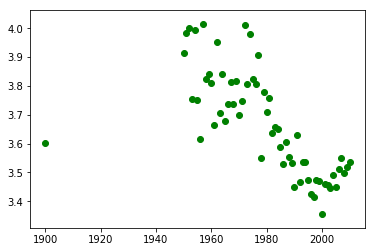

In [192]:
# Наглядно видно, что раньше ставили рейтинг фильмам выше 
x=[int(i) for i in sorted_rating['year'] ]
y=[float(i) for i in sorted_rating['mean'] ]
plt.scatter(x,y, marker='o', color='g')
